**Part 1: Data Preprocessing**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

In [5]:
df_test = pd.read_csv('https://raw.githubusercontent.com/mredshaw/Ensemble_Learning_Banking_Marketing/main/data/test.csv', ";")
df_train = pd.read_csv('https://raw.githubusercontent.com/mredshaw/Ensemble_Learning_Banking_Marketing/main/data/train.csv', ";")

/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_11496/4136863004.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_test = pd.read_csv('https://raw.githubusercontent.com/mredshaw/Ensemble_Learning_Banking_Marketing/main/data/test.csv', ";")
/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_11496/4136863004.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_train = pd.read_csv('https://raw.githubusercontent.com/mredshaw/Ensemble_Learning_Banking_Marketing/main/data/train.csv', ";")


In [6]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Many 'unknown' values. I will explore this in a little while.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


All the datatypes seem to make sense with the data. Nothing to change here. One Hot encoding will be used later on in the pipeline to convert categorical objects to numerical representations.

In [10]:
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df_test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No null values, great! I will drop any duplicates just in case they exist.

In [12]:
df_train.drop_duplicates(inplace= True)
df_test.drop_duplicates(inplace= True)

In [13]:
df_train['y'].unique()

array(['no', 'yes'], dtype=object)

I want to check the distribution of the target variable

In [14]:
print(df_test['y'].value_counts())
print(df_train['y'].value_counts())

no     4000
yes     521
Name: y, dtype: int64
no     39922
yes     5289
Name: y, dtype: int64


The target variable is extremely inbalanced. Synthetic sampling may be needed to balance the training data for the models to function more effectively. I will also convert the y value to binary 0 and 1 for ease of use later on.

In [15]:
df_test['y'] = df_test['y'].map({'yes': 1, 'no': 0})
df_train['y'] = df_train['y'].map({'yes': 1, 'no': 0})

Now I'm going to look into the unknown values to see how many there are per column and the proportion they take up per column.

In [16]:
unknown_counts_train = (df_train == 'unknown').sum()
columns_with_unknown_train = unknown_counts_train[unknown_counts_train > 0]
proportion_with_unknown_train = unknown_counts_train[unknown_counts_train > 0] / len(df_train)
print(columns_with_unknown_train,  proportion_with_unknown_train*100)

job            288
education     1857
contact      13020
poutcome     36959
dtype: int64 job           0.637013
education     4.107407
contact      28.798301
poutcome     81.747805
dtype: float64


In [17]:
unknown_counts_test = (df_test == 'unknown').sum()
columns_with_unknown_test = unknown_counts_test[unknown_counts_test > 0]
proportion_with_unknown_test = unknown_counts_test[unknown_counts_test > 0] / len(df_test)
print(columns_with_unknown_test,  proportion_with_unknown_test*100)

job            38
education     187
contact      1324
poutcome     3705
dtype: int64 job           0.840522
education     4.136253
contact      29.285556
poutcome     81.950896
dtype: float64


There are values 'unknown'. in columns job and education, however the amount is small enough where I feel I could simply impute the data with the mode values of the columns. For contact and poutcome, the proportion of 'unknown' is much higher and a different approach may be needed. I'll impute job and education with mode for now.

In [18]:
df_train['job'].replace('unknown', df_train['job'].mode()[0], inplace=True)
df_train['education'].replace('unknown', df_train['education'].mode()[0], inplace=True)
df_test['job'].replace('unknown', df_test['job'].mode()[0], inplace=True)
df_test['education'].replace('unknown', df_test['education'].mode()[0], inplace=True)

For the contact column, I'm going to look to impute the unknown values using a classification model to predict what the values should be. I'm doing this because there's 30% of the values that are 'unknown' and imputing with mode would likely cause too much bias, so I'm taking this approach instead. I will make a training dataset that includes the rows with no 'unknown' values in contact, and then use a decision tree to predict the values of the unknown contact values if the accuracy is high enough.

In [19]:
contact_train = df_train[df_train['contact'] != 'unknown'] # setting the training data to be the rows that do not have unknown in the contact column
contact_train = contact_train.drop('y', axis=1) #removing y from the data as this would not be available for imputation predictions
contact_predict = df_train[df_train['contact'] == 'unknown'] #setting the predict data to include the rows with unknown in the contact column
contact_predict = contact_predict.drop('y', axis=1) # removing y column once again.

I'm going to now build the model, splitting the contact train data to be train and validation, and setting the contact column as the target.

In [20]:
X = contact_train.drop(['contact'], axis=1)
y= contact_train['contact']

X_train_actual, X_valid, y_train_actual, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_actual)

X_valid_encoded = encoder.transform(X_valid)
X_predict_encoded = encoder.transform(contact_predict.drop('contact', axis=1))

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train_encoded, y_train_actual)

y_valid_pred = dt.predict(X_valid_encoded)

accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Accuracy of imputation on the validation set: {accuracy:.2f}")

predicted_values = dt.predict(X_predict_encoded)

df_train.loc[df_train['contact'] == 'unknown', 'contact'] = predicted_values

Accuracy of imputation on the validation set: 0.88


I'm happy with 88% accuracy and will utilize this imputation method for both df_train and df_test data.

In [22]:
contact_train_2 = df_test[df_test['contact'] != 'unknown']
contact_predict_2 = df_test[df_test['contact'] == 'unknown']

X_train_actual_2, X_valid_2, y_train_actual_2, y_valid_2 = train_test_split(
    contact_train_2.drop('contact', axis=1),
    contact_train_2['contact'],
    test_size=0.3,
    random_state=42
)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded_2 = encoder.fit_transform(X_train_actual_2)

X_valid_encoded_2 = encoder.transform(X_valid_2)
X_predict_encoded_2 = encoder.transform(contact_predict_2.drop('contact', axis=1))

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train_encoded_2, y_train_actual_2)

y_valid_pred_2 = dt.predict(X_valid_encoded_2)

accuracy = accuracy_score(y_valid_2, y_valid_pred_2)
print(f"Accuracy of imputation on the validation set: {accuracy:.2f}")

predicted_values_2 = dt.predict(X_predict_encoded_2)

df_test.loc[df_test['contact'] == 'unknown', 'contact'] = predicted_values_2

Accuracy of imputation on the validation set: 0.89


Check to see if the imputation worked and the values still make sense.

In [24]:
print('df_train contact value counts after imputation:\n', df_train['contact'].value_counts())
print('df_train contact value counts after imputation:\n', df_test['contact'].value_counts())

df_train contact value counts after imputation:
 cellular     41510
telephone     3701
Name: contact, dtype: int64
df_train contact value counts after imputation:
 cellular     4135
telephone     386
Name: contact, dtype: int64


Looks good! I think that's all for cleaning. I'll continue with analysis.

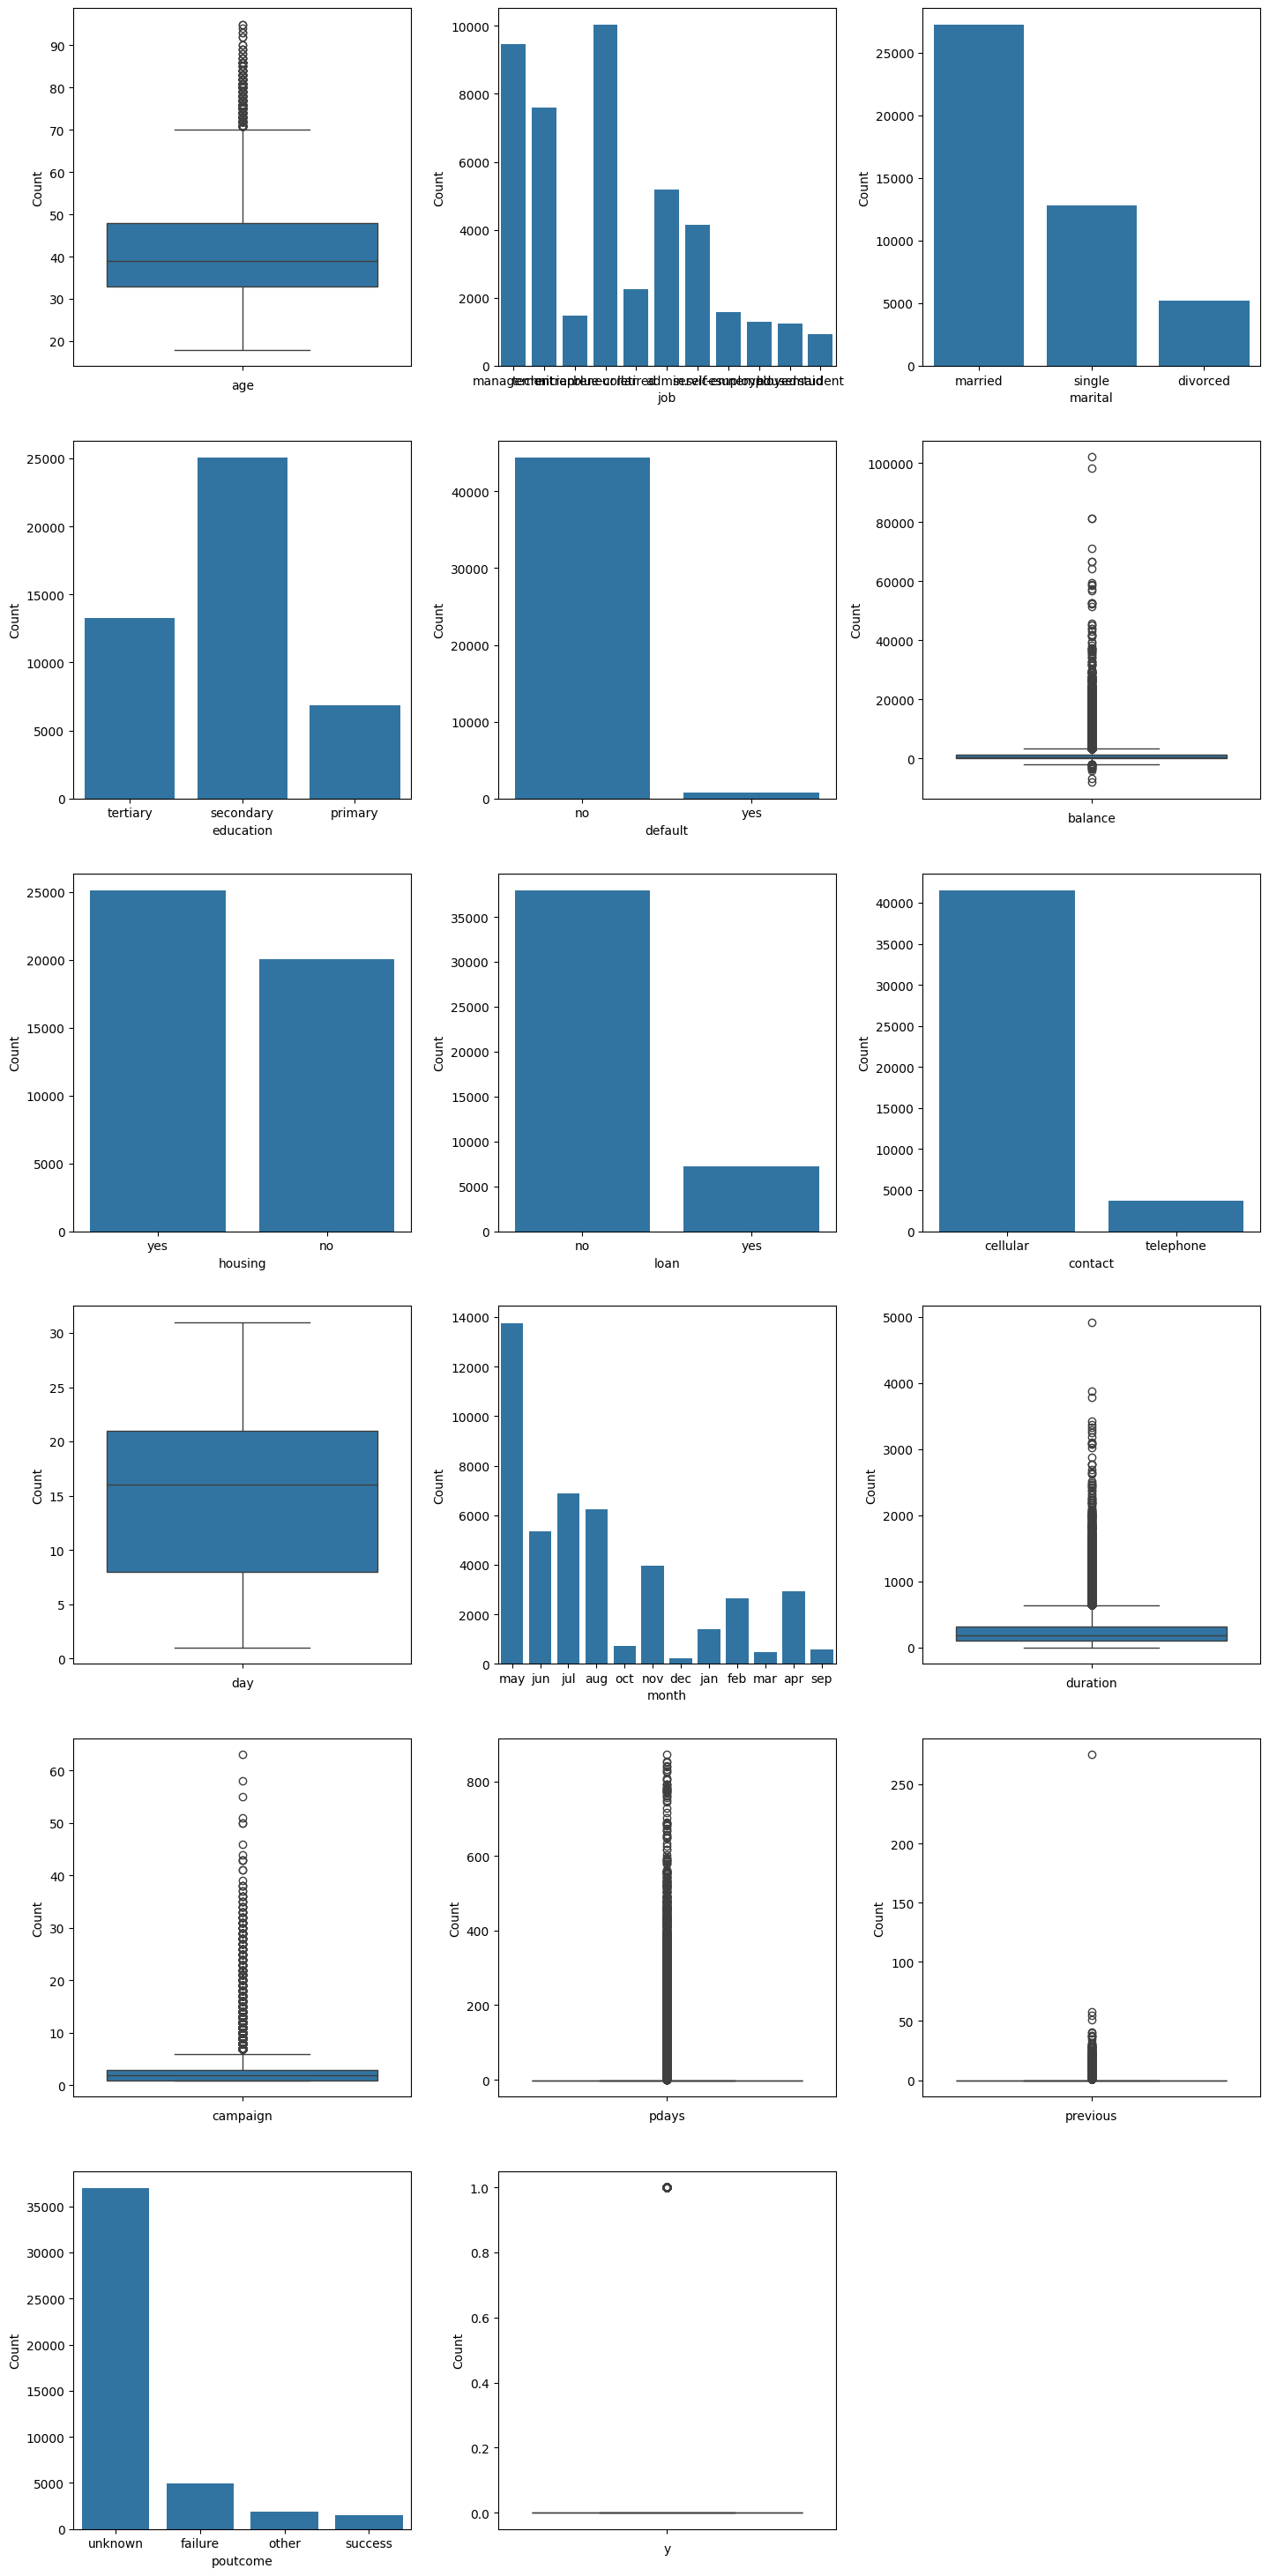

In [25]:
columns = df_train.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=4.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]

    if np.issubdtype(df_train[column].dtype, np.number):
        sns.boxplot(data=df_train, y=column, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
    else:
        sns.countplot(data=df_train, x=column, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)



plt.show()

For most numerical data, there are many values considered outliers. However, since this is a classification problem, we have models available that are able to handle outliers quite well. The only outlier I think I will remove is the previous column value above 250, as it is one outlier value that is extremely far from the mean of the data as well as the other outliers.

In [26]:
df_train[df_train['previous']> 250]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,0


In [27]:
df_train = df_train[df_train['previous'] <= 250]

I'm going to check the distribution of the data.

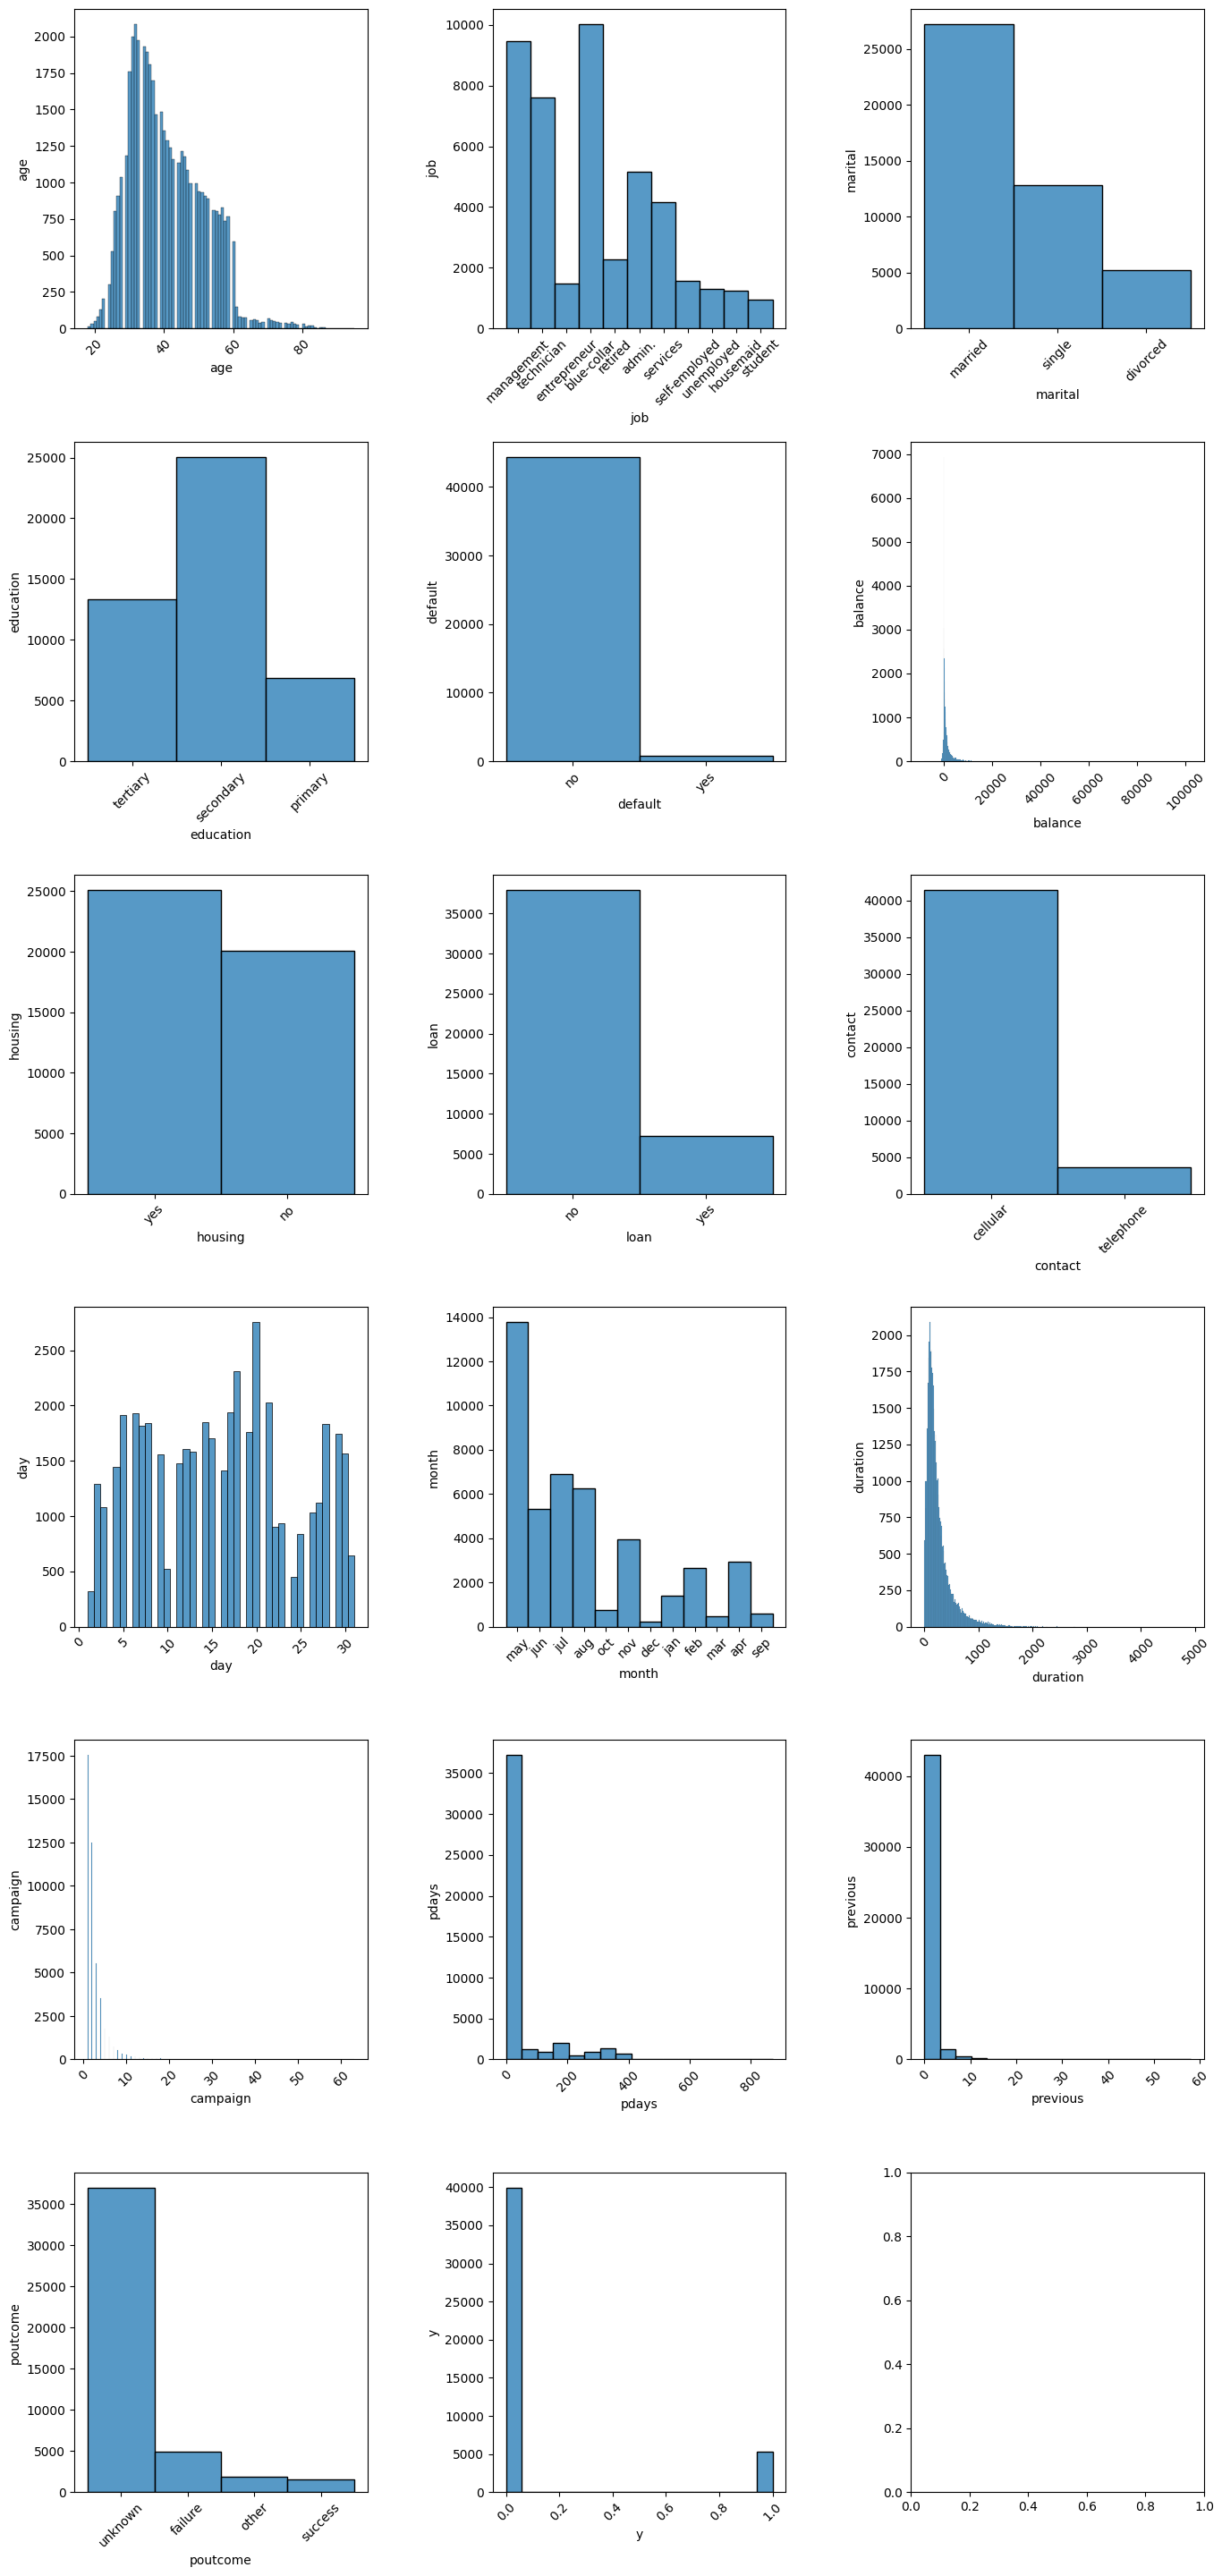

In [28]:
columns = df_train.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df_train, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

Highly skewed data overall. Should consider this when determining which models to use.

I'm going to leave the remainder of the outliers. There are so many in this dataset that removing all outliers would remove far to much of the data, so we should look to use models that will handle outliers well. We can see though that in both the test and train datasets, there's lots of inbalance in the y target variable. This may cause problems for baseline models. I'll keep this in mind, as synthetic sampling may be needed.

I will do some bivariant analysis to see the relationships between the features and the target variable

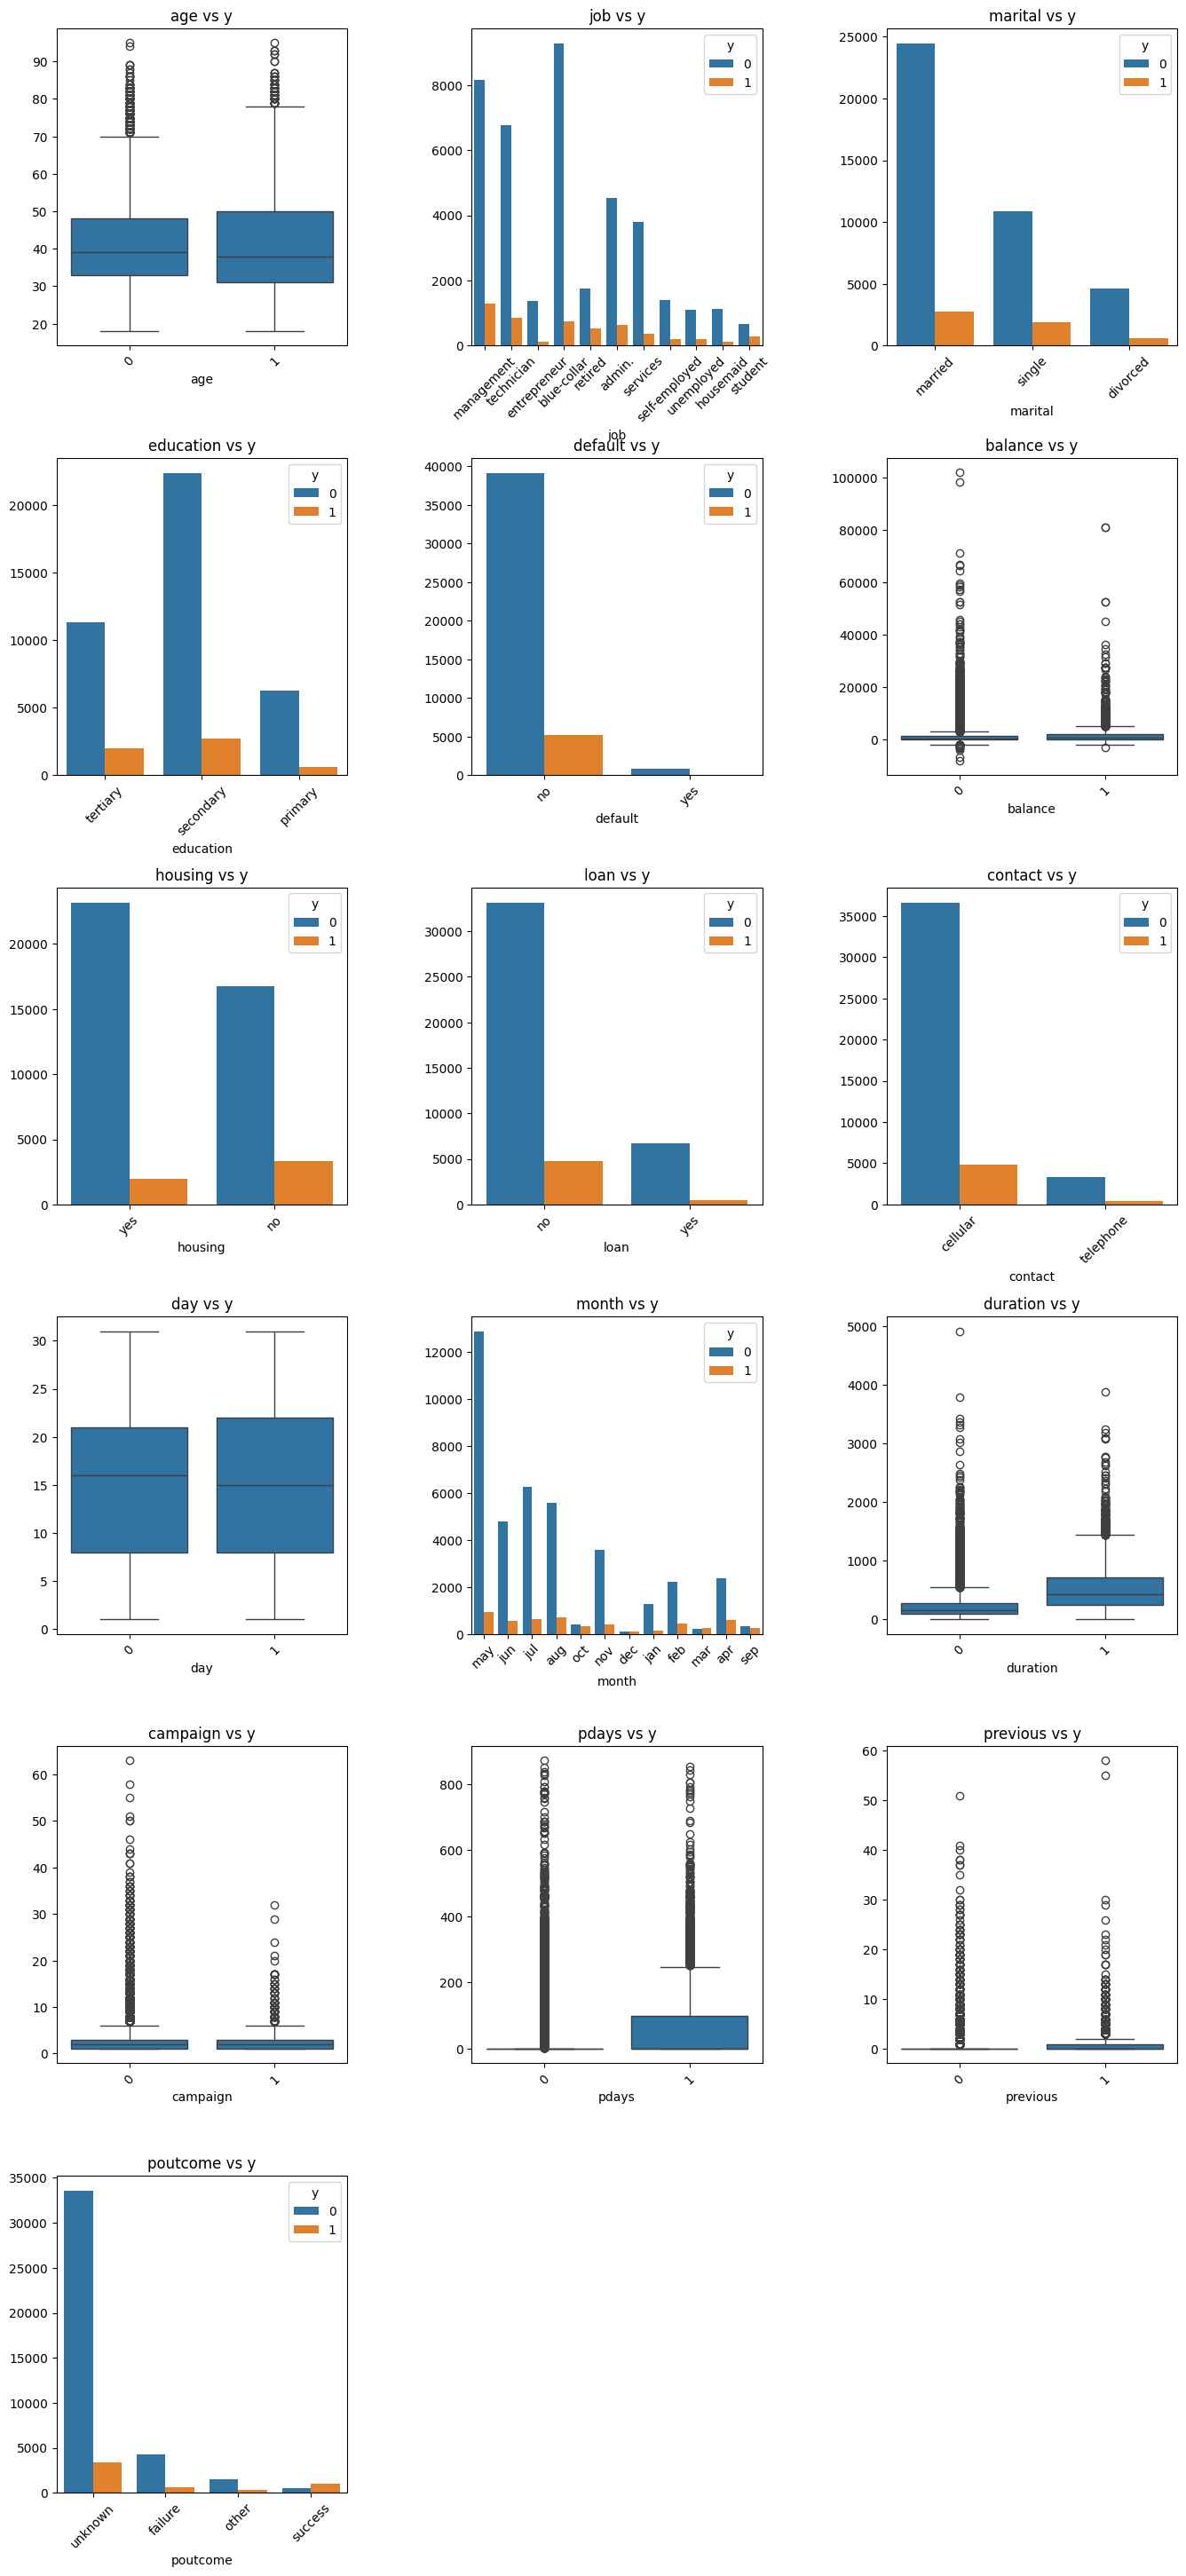

In [29]:
columns = df_train.columns.drop('y')
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad= 7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    
    if np.issubdtype(df_train[column].dtype, np.number):
        sns.boxplot(data=df_train, y=column, x='y', ax=ax)
    else:
        sns.countplot(data=df_train, x=column, hue='y', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel('')
    ax.set_title(f"{column} vs y")
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)

plt.show()

There's a few takeaways that we can see in these graphs: 
1. People who have subscribed seem to skew a little older 
2. Job seems to matter (with retired people seeming to subscribe at a higher relative rate) 
3. Marital status and education seem to have an effect (proportional analysis could help clarify this further) 
4. People who have defaulted never subscribe 
5. People who subscribe seem to have higher balances (on average) 
6. Those without housing or personal loans subscribe at a higher percentage rate than those with loans 
7. Those with the preferred contact method of cellphone vs telephone seem to subscribe at a hgiher rate
8. Time of year (month) definitely seems to make a huge impact 
9. Those who had longer contact times during the last call on average tended to subscribe more often. 
10. The number of contacts performed during the campaign seems to be significant as well, with customers contacted over roughly 35 times never subscribing. 

I will look into these further to see if any new features can be created to help the models.

In [30]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'campaign','poutcome']
num_columns = ['balance', 'pdays', 'previous']
target = 'y'

In [31]:
num_grouped = df_train[num_columns].groupby(df_train['y']).mean()

def mode_agg(x):
    return x.mode().iloc[0]

cat_grouped = df_train[cat_columns].groupby(df_train['y']).agg(mode_agg)
df_train_grouped = pd.concat([num_grouped, cat_grouped], axis=1)

In [32]:
df_train_grouped.head()

,balance,pdays,previous,job,marital,education,default,housing,loan,contact,day,month,campaign,poutcome
y,,,,,,,,,,,,,,
0,1303.734025,36.415721,0.495278,blue-collar,married,secondary,no,yes,no,cellular,20,may,1,unknown
1,1804.267915,68.702968,1.170354,management,married,secondary,no,no,no,cellular,30,may,1,unknown


We can see how the data changes based on a subscription and non subscription here. I'm going to do some feature engineering. I want to create new features with loan information, as well as create a binary contacted or not contacted column based on pdays.

In [33]:
#create binary contacted column
df_train.insert(14, 'contacted', np.where(df_train['pdays'] == -1, 0, 1))
df_test.insert(14, 'contacted', np.where(df_test['pdays'] == -1, 0, 1))

I'm going to make some additional features using loan information as it was a big factor in success. I'll first rename the current columns so they're better descriptions of what the columns are, and then I will make two binary columns for any loans and both loans to see if that information helps the models.

In [34]:
df_train.rename(columns={'loan': 'personal_loan'}, inplace=True)
df_test.rename(columns={'loan': 'personal_loan'}, inplace=True)
df_train.rename(columns={'housing': 'housing_loan'}, inplace=True)
df_test.rename(columns={'housing': 'housing_loan'}, inplace=True)

Making the binary any loans and both loans columns

In [35]:
df_train.insert(8, 'any_loans', np.where((df_train['housing_loan'] == 'yes') | (df_train['personal_loan'] == 'yes'), 1, 0))
df_test.insert(8, 'any_loans', np.where((df_test['housing_loan'] == 'yes') | (df_test['personal_loan'] == 'yes'), 1, 0))

In [36]:
df_train.insert(9, 'both_loans', np.where((df_train['housing_loan'] == 'yes') & (df_train['personal_loan'] == 'yes'), 1, 0))
df_test.insert(9, 'both_loans', np.where((df_test['housing_loan'] == 'yes') & (df_test['personal_loan'] == 'yes'), 1, 0))

In [37]:
df_train.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,any_loans,both_loans,contact,day,month,duration,campaign,pdays,contacted,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,1,0,cellular,5,may,261,1,-1,0,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,1,0,cellular,5,may,151,1,-1,0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,1,cellular,5,may,76,1,-1,0,0,unknown,0
3,47,blue-collar,married,secondary,no,1506,yes,no,1,0,cellular,5,may,92,1,-1,0,0,unknown,0
4,33,blue-collar,single,secondary,no,1,no,no,0,0,cellular,5,may,198,1,-1,0,0,unknown,0


I'm going to view how these new columns show up based on y values

KeyboardInterrupt: 

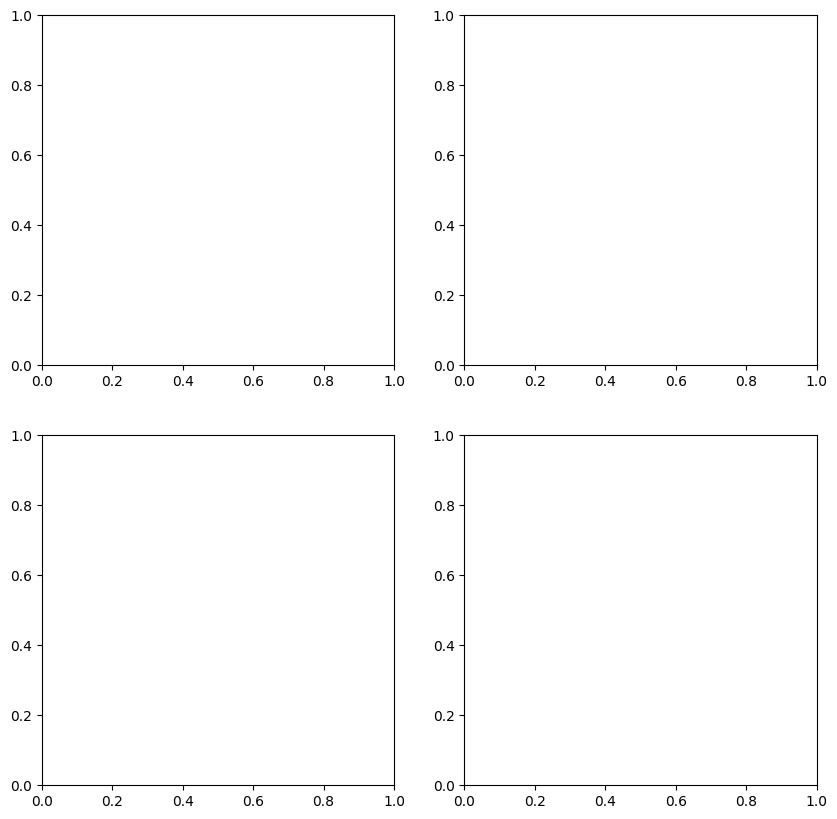

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(data=df_train, x='any_loans', hue='y', ax=ax1)
sns.countplot(data=df_train, x='both_loans', hue='y', ax=ax2)
sns.countplot(data=df_train, x='housing_loan', hue='y', ax=ax3)
sns.countplot(data=df_train, x='personal_loan', hue='y', ax=ax4)

In [ ]:
def subscribe_rate(df, column):

    grouped = df.groupby([column, 'y']).size().unstack()
    grouped['percentage'] = (grouped[1] / grouped.sum(axis=1)) * 100
    result = grouped['percentage']
    print(result)

In [ ]:
subscribe_rate(df_train, 'any_loans')
subscribe_rate(df_train, 'both_loans')
subscribe_rate(df_train, 'housing_loan')
subscribe_rate(df_train, 'personal_loan')


any_loans
0    18.222506
1     7.691209
Name: percentage, dtype: float64
both_loans
0    12.300761
1     6.068239
Name: percentage, dtype: float64
housing_loan
no     16.702355
yes     7.700267
Name: percentage, dtype: float64
personal_loan
no     12.656061
yes     6.681391
Name: percentage, dtype: float64


Based on this, those that have no loans subscribe at the highest rate, and those with both loans subscribe at the lowest rate.

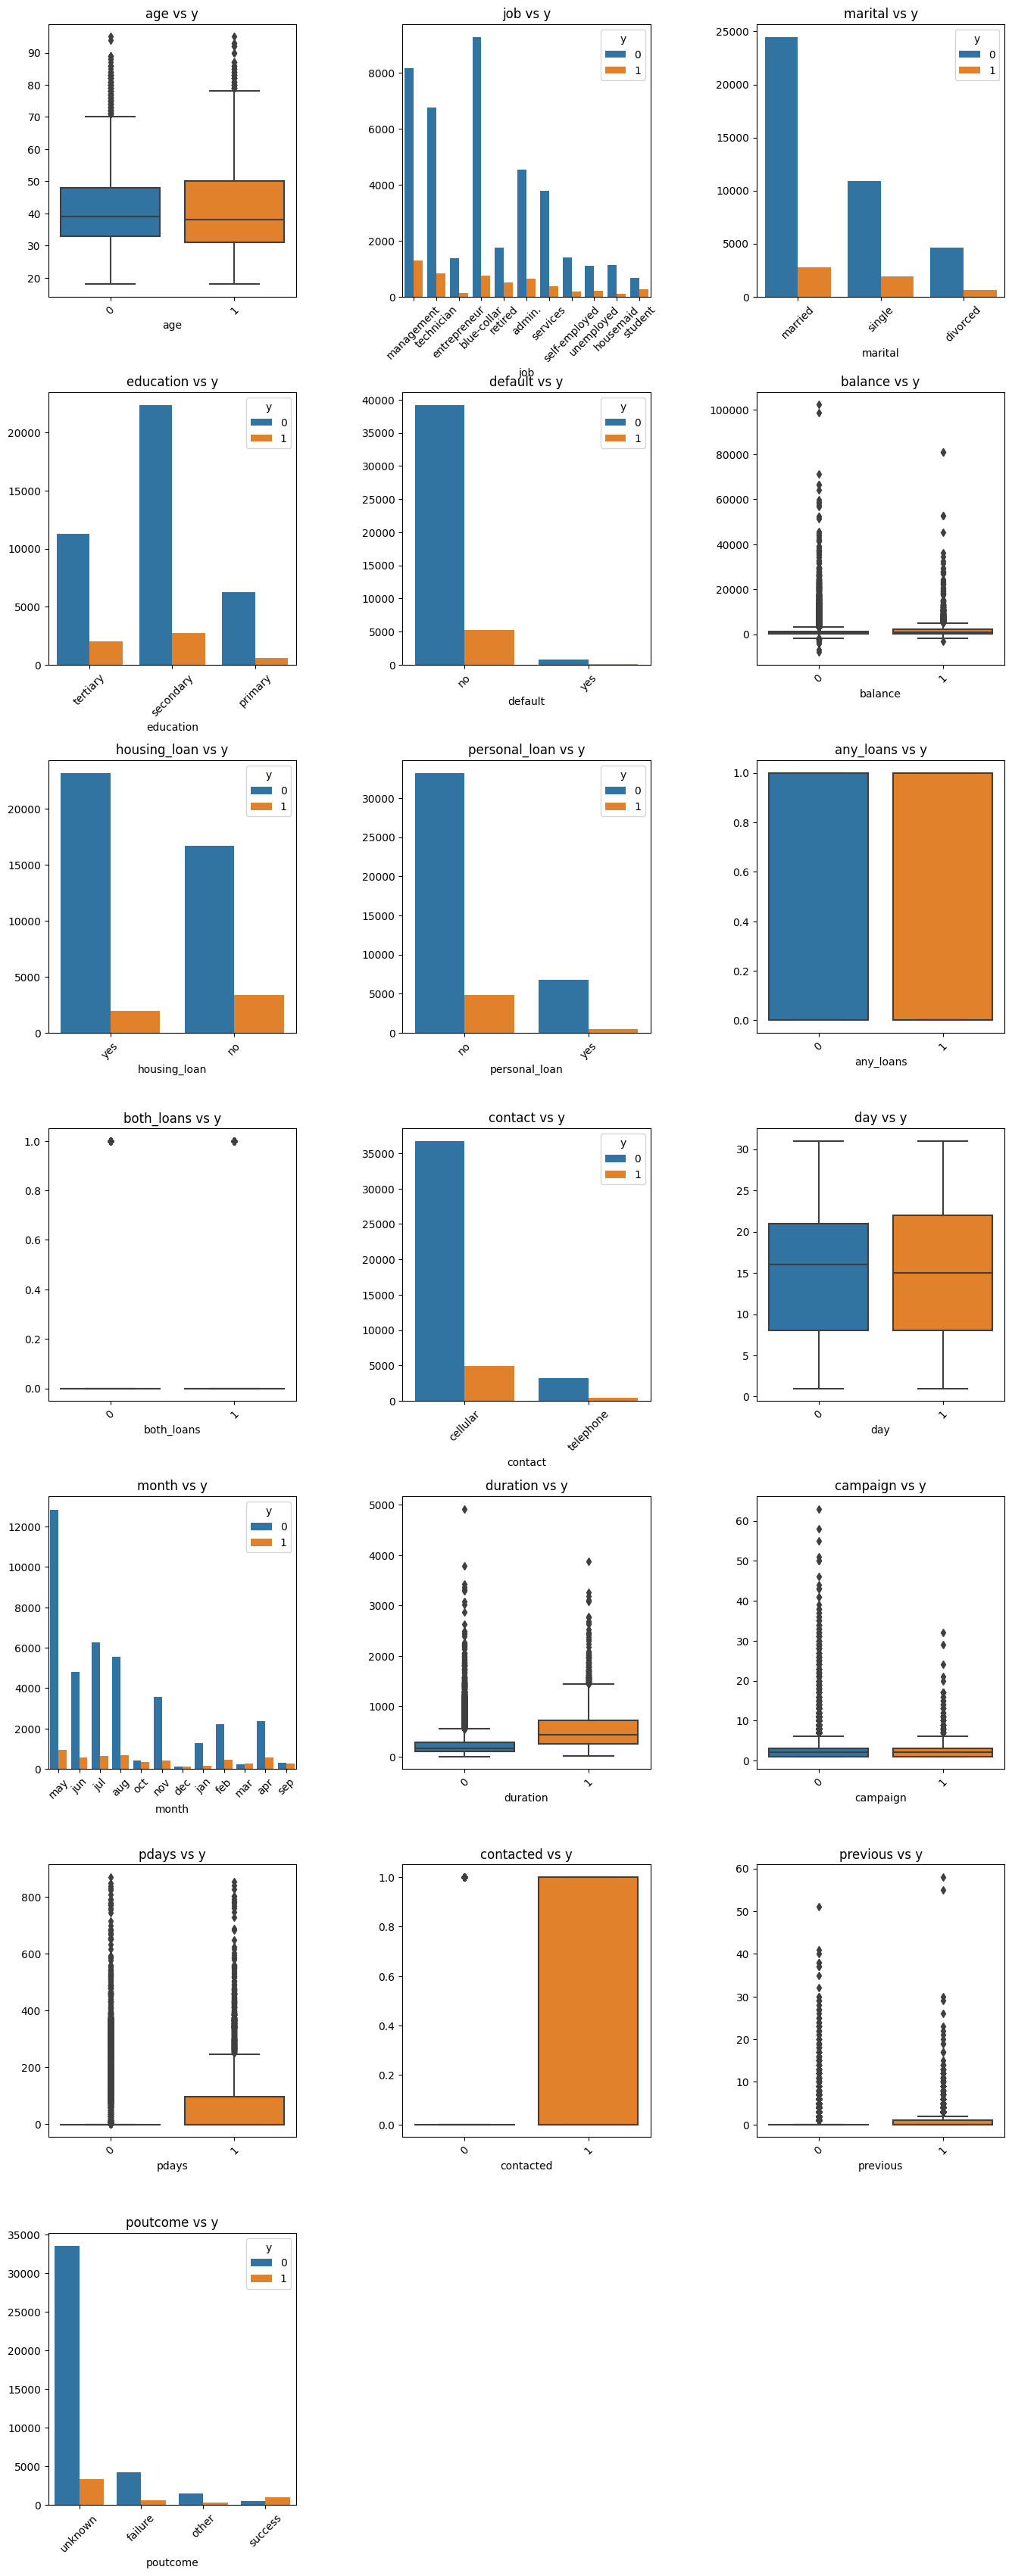

In [ ]:
columns = df_train.columns.drop('y')
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad= 7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    
    if np.issubdtype(df_train[column].dtype, np.number):
        sns.boxplot(data=df_train, y=column, x='y', ax=ax)
    else:
        sns.countplot(data=df_train, x=column, hue='y', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel('')
    ax.set_title(f"{column} vs y")
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)

plt.show()

To get more business insights, I'm going to compare the percentage rate of success for various categories. To make this possible, I'm going to put continuous variables like balance, age, duration into 4 bins based on data range.

In [ ]:
df_train.describe(include='all')

,age,job,marital,education,default,balance,housing_loan,personal_loan,any_loans,both_loans,contact,day,month,duration,campaign,pdays,contacted,previous,poutcome,y
count,45210.000000,45210,45210,45210,45210,45210.000000,45210,45210,45210.000000,45210.000000,45210,45210.000000,45210,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210,45210.000000
unique,NaN,11,3,3,2,NaN,2,2,NaN,NaN,2,NaN,12,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,10020,27213,25059,44395,NaN,25129,37966,NaN,NaN,41545,NaN,13766,NaN,NaN,NaN,NaN,NaN,36959,NaN
mean,40.936231,NaN,NaN,NaN,NaN,1362.290179,NaN,NaN,0.619465,0.096594,NaN,15.806724,NaN,258.161071,2.763858,40.192922,0.182614,0.574253,NaN,0.116987
std,10.618879,NaN,NaN,NaN,NaN,3044.797065,NaN,NaN,0.485524,0.295407,NaN,8.322315,NaN,257.530306,3.098053,100.124419,0.386354,1.907928,NaN,0.321409
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,0.000000,0.000000,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,1.000000,0.000000,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,0.000000,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,1.000000,0.000000,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,0.000000,NaN,0.000000


To better review some of the continuous variables, I'm going to place them in bins to see how certain groupings of people impact the subscription rates.

In [ ]:
def balance_bin(x):
    if x < 0:
        return 1
    elif x >= 0 and x < 500:
        return 2
    elif x >= 500 and x < 2000:
        return 3
    elif x >= 2000 and x < 4000:
        return 4
    elif x >=4000:
        return 5

In [ ]:
df_train['balance_bin'] = df_train['balance'].apply(balance_bin)
df_test['balance_bin'] = df_test['balance'].apply(balance_bin)

In [ ]:
subscribe_rate(df_train, 'balance_bin')
subscribe_rate(df_test, 'balance_bin')

balance_bin
1     5.576208
2     9.924010
3    12.994566
4    17.169525
5    15.850218
Name: percentage, dtype: float64
balance_bin
1     8.469945
2     9.316155
3    12.880000
4    18.502203
5    13.163972
Name: percentage, dtype: float64


Those with over 2000 in balance subscribe at the highest rate.

<Axes: xlabel='balance_bin', ylabel='count'>

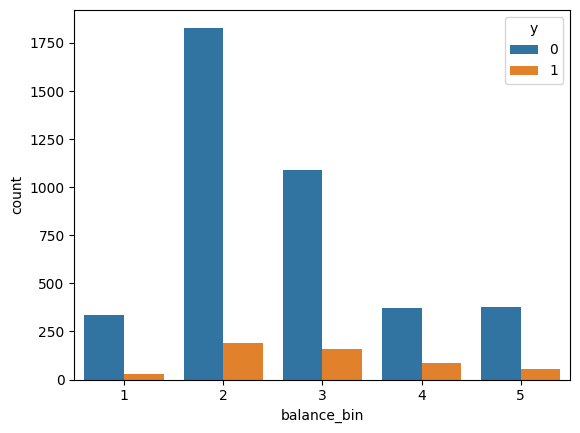

In [ ]:
sns.countplot(data=df_test, x='balance_bin', hue='y')

In [ ]:
def age_bin(x):
    if x >= 18 and x <25:
        return 1
    elif x >= 25 and x <35:
        return 2
    elif x >= 35 and x < 45:
        return 3
    elif x >= 45 and x < 65:
        return 4
    elif x >=65:
        return 5

In [ ]:
df_train['age_bin'] = df_train['age'].apply(age_bin)
df_test['age_bin'] = df_test['age'].apply(age_bin)

In [ ]:
subscribe_rate(df_train, 'age_bin')
subscribe_rate(df_test, 'age_bin')

age_bin
1    25.587145
2    12.482399
3     9.660772
4    10.529150
5    42.098765
Name: percentage, dtype: float64
age_bin
1    19.402985
2    11.743772
3     9.409341
4    11.569149
5    35.955056
Name: percentage, dtype: float64


People over the age of 65 subscribe most often, followed by people aged 18 to 25

<Axes: xlabel='age_bin', ylabel='count'>

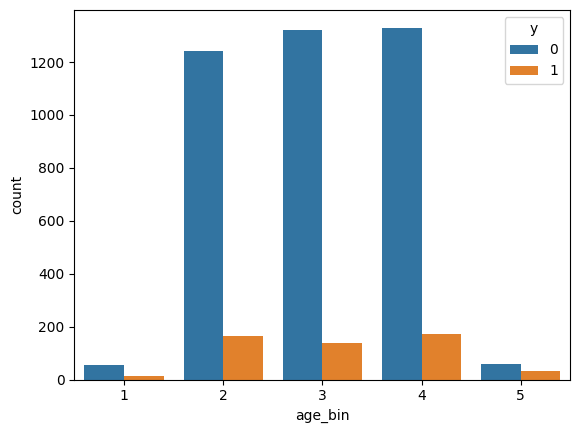

In [ ]:
sns.countplot(data=df_test, x='age_bin', hue='y')

In [ ]:
def duration_bin(x):
    if x <100:
        return 1
    elif x >= 100 and x <300:
        return 2
    elif x >= 300 and x < 750:
        return 3
    elif x >= 750:
        return 4

In [ ]:
df_train['duration_bin'] = df_train['duration'].apply(duration_bin)
df_test['duration_bin'] = df_test['duration'].apply(duration_bin)

In [ ]:
subscribe_rate(df_train, 'duration_bin')
subscribe_rate(df_test, 'duration_bin')

duration_bin
1     1.053711
2     7.712790
3    22.171406
4    54.493392
Name: percentage, dtype: float64
duration_bin
1     1.323251
2     6.827492
3    21.972656
4    54.545455
Name: percentage, dtype: float64


Those who stayed on call for over 750 seconds converted over half the time.

<Axes: xlabel='duration_bin', ylabel='count'>

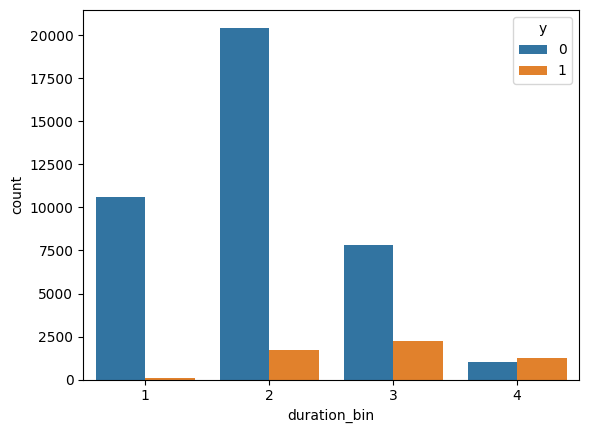

In [ ]:
sns.countplot(data=df_train, x='duration_bin', hue='y')

In [ ]:
def campaign_bin(x):
    if x == 1:
        return 1
    elif x >= 2 and x <5:
        return 2
    elif x >= 5 and x < 10:
        return 3
    elif x >= 10 and x < 15:
        return 4
    elif x >= 15:
        return 5

In [ ]:
df_train['campaign_bin'] = df_train['campaign'].apply(campaign_bin)
df_test['campaign_bin'] = df_test['campaign'].apply(campaign_bin)

In [ ]:
subscribe_rate(df_train, 'campaign_bin')
subscribe_rate(df_test, 'campaign_bin')

campaign_bin
1    14.597583
2    10.841416
3     7.107580
4     5.188679
5     2.768730
Name: percentage, dtype: float64
campaign_bin
1    13.840830
2    11.085235
3     7.660455
4     4.123711
5     3.333333
Name: percentage, dtype: float64


It appears as though less contacts = higher chance of subscribing.

<Axes: xlabel='campaign_bin', ylabel='count'>

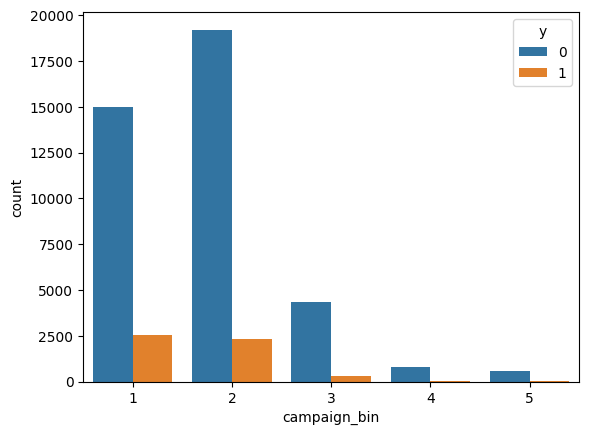

In [ ]:
sns.countplot(data=df_train, x='campaign_bin', hue='y')

In [ ]:
def previous_bin(x):
    if x == 0:
        return 1
    
    elif x == 1:
        return 2
    
    elif x > 1 and x < 20:
        return 3
    
    elif x >= 20 and x <30:
        return 4
    
    elif x >= 30 and x <50:
        return 5
    
    elif x >= 50:
        return 6

In [ ]:
df_train['previous_bin'] = df_train['previous'].apply(previous_bin)
df_test['previous_bin'] = df_test['previous'].apply(previous_bin)

In [ ]:
subscribe_rate(df_train, 'previous_bin')
subscribe_rate(df_test, 'previous_bin')

previous_bin
1     9.157331
2    21.031746
3    24.216156
4    12.500000
5     9.090909
6    66.666667
Name: percentage, dtype: float64
previous_bin
1     9.095816
2    17.832168
3    25.333333
4          NaN
Name: percentage, dtype: float64


<Axes: xlabel='previous_bin', ylabel='count'>

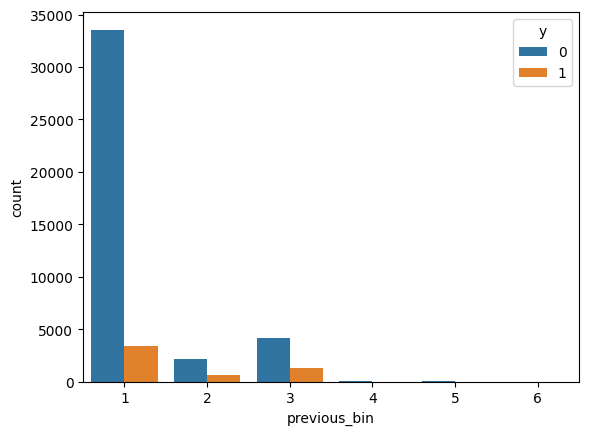

In [ ]:
sns.countplot(data=df_train, x='previous_bin', hue='y')

In [ ]:
def pdays_bin(x):
    if x == -1:
        return 1
    elif x >= 0 and x < 100:
        return 2
    elif x >= 100 and x < 200:
        return 3
    elif x >= 200 and x <400:
        return 4
    elif x >= 400:
        return 4

In [ ]:
df_train['pdays_bin'] = df_train['pdays'].apply(pdays_bin)
df_test['pdays_bin'] = df_test['pdays'].apply(pdays_bin)

In [ ]:
subscribe_rate(df_train, 'pdays_bin')
subscribe_rate(df_test, 'pdays_bin')

pdays_bin
1     9.157331
2    43.496802
3    26.050712
4    13.677582
Name: percentage, dtype: float64
pdays_bin
1     9.095816
2    45.522388
3    23.333333
4    13.874346
Name: percentage, dtype: float64


Contacting customers again before 100 days has passed appears to be the best approach.

<Axes: xlabel='pdays_bin', ylabel='count'>

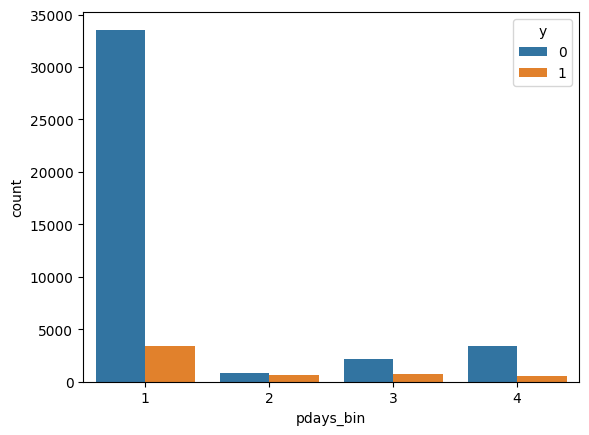

In [ ]:
sns.countplot(data=df_train, x='pdays_bin', hue='y')

In [ ]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing_loan', 'personal_loan', 'any_loans', 'both_loans', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'contacted',
       'previous', 'poutcome', 'y', 'balance_bin', 'age_bin', 'duration_bin',
       'campaign_bin', 'previous_bin', 'pdays_bin'],
      dtype='object')

Now that we've got some good business insights into who seems to convert at the higher rates with the bins made, let's look at other categories.

In [ ]:
subscribe_rate(df_train, 'job')
subscribe_rate(df_test, 'job')
print('---------------------------')
subscribe_rate(df_train, 'marital')
subscribe_rate(df_test, 'marital')
print('---------------------------')
subscribe_rate(df_train, 'education')
subscribe_rate(df_test, 'education')
print('---------------------------')
subscribe_rate(df_train, 'default')
subscribe_rate(df_test, 'default')
print('---------------------------')
subscribe_rate(df_train, 'contact')
subscribe_rate(df_test, 'contact')
print('---------------------------')

job
admin.           12.202669
blue-collar       7.405190
entrepreneur      8.271688
housemaid         8.790323
management       13.757005
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
Name: percentage, dtype: float64
job
admin.           12.133891
blue-collar       7.293869
entrepreneur      8.928571
housemaid        12.500000
management       13.704071
retired          23.478261
self-employed    10.928962
services          9.112710
student          22.619048
technician       10.807292
unemployed       10.156250
Name: percentage, dtype: float64
---------------------------
marital
divorced    11.945458
married     10.123838
single      14.949179
Name: percentage, dtype: float64
marital
divorced    14.583333
married      9.903468
single      13.963211
Name: percentage, dtype: float64
---------------------------
education
primary       8.626478
secondary    10.782553
tertia

Now that we have insights, let's start building the models. Let's start with the baseline models.

Import warning filter to stop filter pop ups when running the models

In [ ]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

I've decided to remove poutcome from the models since 80% of the values are unknown. If the models are not accurate, I can look to add it back in if needed.

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'any_loans', 'both_loans']
num_columns = ['balance', 'pdays', 'previous', 'campaign', 'duration']
target = 'y'

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)])

For this data, a simple OneHotEncoding and StandardScaler should be enough to prepare this data for modelling. This will ensure categorical data has numerical representation, and will scale down any numerical data if needed.

Setting the train and test values and columns

In [ ]:
X_train = df_train[cat_columns + num_columns]
X_test = df_test[cat_columns + num_columns]
y_train = df_train[target]
y_test = df_test[target]

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

Running smote on the training data to balance the results of y. Initially ran the models without using SMOTE and recall as well as precision were extremely low. Balancing the data should help this.

In [ ]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [ ]:
print(y_train_resampled.value_counts())

0    39921
1    39921
Name: y, dtype: int64


We've successfully used smote to create synthetic entries to balance the data. This should hopefully help improve the models and eliminate the issue of overfitting. 

**Part 2: Build Baseline Models**

Logistic Regression

For hyperparameter tuning, I'm going to use RandomizedSearch instead of GridSearch, since Grid Search was taking far longer to run the models without improving results in any substantial way.

In [ ]:
log_param = {'C': [0.01, 0.1, 10]}
log = LogisticRegression()

random_search_log = RandomizedSearchCV(log, log_param, scoring='recall', cv=5)

random_search_log.fit(X_train_resampled, y_train_resampled)
best_log_reg = random_search_log.best_estimator_
y_pred_log = best_log_reg.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_log.best_params_)
cv_scores = cross_val_score(best_log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print(classification_report(y_test, y_pred_log))

Best parameters found:  {'C': 0.01}
Average CV Recall Score: 83.08%
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      4000
           1       0.38      0.79      0.51       521

    accuracy                           0.83      4521
   macro avg       0.67      0.81      0.70      4521
weighted avg       0.90      0.83      0.85      4521



To check the difference between the SMOTE set and the unbalanced set, I'll run LogisticRegression with the unbalanced set as well to see the difference.

In [ ]:
log_param = {'C': [0.01, 0.1, 10]}


random_search_log = RandomizedSearchCV(log, log_param, scoring='recall', cv=5)

random_search_log.fit(X_train_preprocessed, y_train)
best_log_reg = random_search_log.best_estimator_
y_pred_log = best_log_reg.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_log.best_params_)
cv_scores = cross_val_score(best_log_reg, X_train_preprocessed, y_train, cv=3, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print(classification_report(y_test, y_pred_log))

Best parameters found:  {'C': 10}
Average CV Recall Score: 33.69%
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4000
           1       0.57      0.25      0.35       521

    accuracy                           0.89      4521
   macro avg       0.74      0.61      0.65      4521
weighted avg       0.87      0.89      0.87      4521



As we can see, this improved things drastically. Let's use the resampled data for the models now.

KNN

In [ ]:
params_knn = {'n_neighbors': [3, 5, 7, 20, 30, 50]}
knn = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(knn, params_knn, cv=3, scoring='recall')

random_search_knn.fit(X_train_resampled, y_train_resampled)
best_knn = random_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_knn.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Best parameters found:  {'n_neighbors': 3}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      4000
           1       0.57      1.00      0.73       521

    accuracy                           0.91      4521
   macro avg       0.79      0.95      0.84      4521
weighted avg       0.95      0.91      0.92      4521



**Part 3: Ensemble Modelling**

Random Forest

In [ ]:
rf_param = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}

rf= RandomForestClassifier()

random_search_rf = RandomizedSearchCV(rf, rf_param, cv=3, scoring= 'recall')

random_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_rf.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best parameters found:  {'n_estimators': 50, 'max_depth': 30}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4000
           1       0.95      0.99      0.97       521

    accuracy                           0.99      4521
   macro avg       0.97      0.99      0.98      4521
weighted avg       0.99      0.99      0.99      4521



AdaBoost

In [ ]:
ada_params = {'n_estimators': [25, 50, 75]}

adaboost = AdaBoostClassifier()

random_search_adaboost = RandomizedSearchCV(adaboost, ada_params, cv=3, scoring='recall')

random_search_adaboost.fit(X_train_resampled, y_train_resampled)
best_adaboost = random_search_adaboost.best_estimator_
y_pred_ada = best_adaboost.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_adaboost.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

Best parameters found:  {'n_estimators': 75}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4000
           1       0.43      0.61      0.51       521

    accuracy                           0.86      4521
   macro avg       0.69      0.75      0.71      4521
weighted avg       0.89      0.86      0.87      4521



Bagging Classifier

In [ ]:
bag_params = {'n_estimators': [5, 10, 20]}

bagging_classifier = BaggingClassifier()

random_search_bagging = RandomizedSearchCV(bagging_classifier, bag_params, cv=3, scoring= 'recall')
random_search_bagging.fit(X_train_resampled, y_train_resampled)
best_bagging = random_search_bagging.best_estimator_
y_pred_bag = best_bagging.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_bagging.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bag))

Best parameters found:  {'n_estimators': 20}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.98      0.99      0.98       521

    accuracy                           1.00      4521
   macro avg       0.99      0.99      0.99      4521
weighted avg       1.00      1.00      1.00      4521



This model has the best results while also being one of the fastest models. To ensure that these results aren't due to overfitting, I'm going to run cross-validation on it

In [ ]:
cv_scores = cross_val_score(best_bagging, X_train_resampled, y_train_resampled, cv=3, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")

Average CV Recall Score: 92.95%


Great! Even with different data splits, this model acheives over 90% recall on average and so far appears to be the best option for predicting subscriptions. This makes sense as Bagging Classifiers are good at fighting against overfitting.

Voting Classifer

In [ ]:
vote_params = {'voting': ['hard', 'soft']}

voting = VotingClassifier(estimators=[('lr', best_log_reg), ('knn', best_knn), ('rf', best_rf)])

random_search_vote = RandomizedSearchCV(voting, vote_params, cv=3, scoring='recall')
random_search_vote.fit(X_train_resampled, y_train_resampled)
best_vote = random_search_vote.best_estimator_
y_pred_vote = best_vote.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_vote.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_vote))

Best parameters found:  {'voting': 'soft'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4000
           1       0.67      1.00      0.80       521

    accuracy                           0.94      4521
   macro avg       0.83      0.97      0.88      4521
weighted avg       0.96      0.94      0.95      4521



**Part 4: Performance Comparison [4 marks]**

Time results:
logistic regression time = 4s
knn time = 9m 55s
Random Forest Time = 5m 20s
AdaBoost time = 19s
Bagging Classifier time = 1m 54s
VotingClassifier = 5m 35s

Comparing the models, I'm utilizing recall as my main metric, followed by precision, then time. Recall is my key metric as we want to be sure the model is effective at predicting who will subscribe without missing any potential subscribers. The recall value would give us this result. Accuracy is not considered due to the fact that the y values are highly imbalanced, so a model that predicts 0 for y every single time would still result in 90% accuracy. For this reason, recall and precision are a better gauge of the model's effectiveness. We can see that both RandomForest and BaggingClassifier both give the best results, with bagging classifer having slightly higher precision and recall. Bagging was not only more effective, but also more than twice as fast than the RandomForest model, making it the best model for this problem in my opinion.

***Part 5: Interpretation and Justification [8 marks]***

1. Why did the ensemble models perform the way they did?

As we can see, the ensemble methods worked quite a bit better than the base models when we consider recall and precision scores. This makes sense, as ensemble methods are not relying on the results of a single data split for training and testing, but instead create variation by splitting and sampling data in different ways and running multiple instances of models to come to a final prediction based on the results of many models, not just one. This data set had many outliers, many of the values were not evenly distributed, and the data it's being tested on is heavily imbalanced (far more y=0 than y=1). With a base model, it would be much more prone to overfitting and would likely struggle under various scenarios. The combination of many model instances and utilizing the combined outcomes of those models (either through averaging or boosting) to come to a final prediction makes the model better fit for datasets like this one.

They did perform as I expected overall. I expected them to perform better than the base models, while also taking more time to run, which makes sense. However, prior to running SMOTE, I had thought the ensemble models would be able to handle the imbalanced 'y' data better, but it ended up being too unbalanced to create a reliable model (high accuracy, but low recall).

2. If you had to pick one model to implement in business process, which would it be and why?

In this case, I would implement the Bagging Classifier. Not only was this the fastest model to run out of the ensemble models, but it also provided the best results; specifically, when looking at recall and precision, which in this case are the more relevant metrics considering the imbalance of y value counts (accuracy could be 90% but the model could be predicting everything as y=0 and still getting accuracy of 90%). The bagging model is also easily understood and explained, it takes random subsets of the training data, creates predictions on each random subset, and then aggregates those predictions to come to a final prediction. For a business, having this level of accuracy would allow the company to know with a high degree of certainty if they are marketing to a customer who is likely to subscribe or not. Using this model, they could determine if they continue to campaign to certain customers, or if they divert resources away from certain customers, making the marketing campaign more effective.
 
The downside of the Bagging Classifier is it's more difficult to see which features have the biggest impact on the model's predictions, which could be useful information for a business to have. Although most of the important information could be found during EDA, if the company requires that feature importance information, they could look to instead go for the Random Forest model - which is a little less accurate and takes more time but will give you the feature importance information. Feature importance information could let the company know exactly what metrics they should be focussing on when looking at which customers to advertise/campaign to.

3. What decision criteria did you use to arrive at this conclusion?

For this decision, recall and precision were the leading metrics when it came to determining the effective accuracy of the models. As mentioned, the imbalanced y data made accuracy values much less valuable, thus knowing how good the model was at avoiding false-positives (precision) and avoiding missing true-positives (recall) was much more useful. Of the two, I prioritized recall when setting the hyperparameters as a model which determines someone is worthy of a marketing campaign and they fail to subscribe is less detrimental to a company than a model which determines a customer is not worthy of a marketing campaign when they would have subscribed. So, recall was the number one metric. 
 
Time was the second factor, as a quicker model that retains its recall, and precision scores is more efficient and scalable than those that take much longer to run. The third metric would be interpretability, as a company's ability to understand how a prediction was made and what features impacted it most could be very important when it comes to advertising to customers (why a customer is rejected or included in a marketing campaign). For this reason, Random Forest was a close second in terms of which model to suggest. If this aspect is very important for the company, Random Forest should be selected.